In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
from tabulate import tabulate
import statsmodels
import math
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

In [3]:
def classify_region(state):
    if state in ['Chandigarh','Delhi','Haryana','Himachal Pradesh','Jammu And Kashmir','Punjab','Rajasthan']:
        return 'NORTHERN REGION'
    elif state in ['Arunachal Pradesh','Assam','Manipur','Meghalaya','Mizoram','Nagaland','Tripura']:  #manipur,mizoram not in data
        return 'NORTH-EASTERN REGION'
    elif state in ['Andaman And Nicobar Islands','Bihar','Jharkhand','Odisha','West Bengal']:#sikkim not in data
        return 'EASTERN REGION'
    elif state in ['Chhattisgarh','Madhya Pradesh','Uttar Pradesh', 'Uttarakhand',  ]:
        return 'CENTRAL REGION'
    if state in ['Dadra & Nagar Haveli','Daman & Diu','Goa','Gujarat','Maharashtra']: # Dadra & Nagar,Daman & Diu Haveli not in data
        return 'WESTERN REGION'
    elif state in ['Andhra Pradesh','Karnataka','Kerala','Lakshadweep','Pondicherry','Tamilnadu','Telangana','Tamil Nadu']: # Lakshadweep not in data  . 'Telangana' added to southern region
        return 'SOUTHERN REGION'
    else:
        print("unknown found", state)
        return 'Unknown'

In [5]:
# Reading data from the csv
df = pd.read_csv(r"..\Excels\merged_table.csv")
gwq='calcium'
# Convert numeric columns to appropriate data type
df['SDP'] = pd.to_numeric(df['SDP'], errors='coerce')
df[gwq] = pd.to_numeric(df[gwq], errors='coerce')
df['Gini'] = pd.to_numeric(df['Gini'], errors='coerce')

df.dropna(subset=['SDP', gwq,'Gini'], inplace=True)

x = df['SDP'].values.reshape(-1, 1)  # Independent variable
y = df[gwq].values  # Dependent variable
x2 = x ** 2
x3 = x ** 3
x4 = df['Gini'].values.reshape(-1, 1)  # Fourth variable

# Create polynomial features
poly = PolynomialFeatures(degree=3)  # You can change the degree here
X_poly = poly.fit_transform(x)

# Add fourth variable
X_poly = np.concatenate((X_poly, x4), axis=1)

# Drop rows with NaN values

df['Region'] = df['state'].apply(classify_region)
dummy_regions = pd.get_dummies(df['Region'], prefix='region')

# Concatenate the original DataFrame with the dummy variable DataFrame
df = pd.concat([df, dummy_regions], axis=1)



final_x_region = X_poly.copy()
region = ['region_NORTHERN REGION','region_NORTH-EASTERN REGION','region_EASTERN REGION','region_CENTRAL REGION','region_WESTERN REGION']  #southern region is the base cat

for rg in region:
    curr_rg = np.array(df[rg]).reshape(-1, 1)  # Reshape to make it a column vector
    # print(curr_rg)
    new_x_poly_rg= []
    
    # Multiply each element of X_poly by the current year and append to new_x_poly
    for i in range(len(X_poly)):
        l = []
        for j in range(len(X_poly[i])):
            l.append(X_poly[i][j] * curr_rg[i])
        # print(l)
        new_x_poly_rg.append(l)
        
    # Convert new_x_poly to numpy array
    new_x_poly_rg = np.array(new_x_poly_rg).reshape(-1, len(X_poly[0]))  # Reshape to match final_x
    
    # Add new_x_poly to final_x by horizontally stacking them
    final_x_region = np.hstack((final_x_region, new_x_poly_rg))
    # print(final_x_region)
    # break

    
    print(final_x_region.shape)



(7187, 10)
(7187, 15)
(7187, 20)
(7187, 25)
(7187, 30)


In [6]:
y = df[gwq].values  # Dependent variable

dummy_region_model = LinearRegression(fit_intercept=True).fit(final_x_region, y)

# Get coefficients and intercept
intercept = dummy_region_model.intercept_
coefficients = dummy_region_model.coef_

# Print coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Evaluate R^2
r_squared = dummy_region_model.score(final_x_region, y)
print("R^2:", r_squared)

Intercept: 37.14979749860284
Coefficients: [-1.45924559e-07  4.77764984e-04 -1.82809542e-09  1.95725597e-15
 -6.12362684e-06  1.47347288e-06  7.45600679e-05 -1.27991113e-09
  3.93429186e-15 -2.76087078e-08 -2.71017880e-07 -2.01022891e-03
  3.63128704e-08 -2.03497369e-13 -6.27728272e-08  6.02026377e-07
 -2.54757809e-04  2.76299015e-10  6.89166335e-16 -6.70722307e-07
 -1.15793021e-07 -2.40044330e-05 -9.13363117e-11  1.09219816e-16
 -3.62283902e-08 -5.28389403e-08 -1.66977254e-04  1.22147119e-09
 -1.62494801e-15 -1.33418619e-08]
R^2: 0.15119843576848124


C:\Users\baljyot\AppData\Local\Temp\ipykernel_20432\979797563.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='calcium', palette="husl")


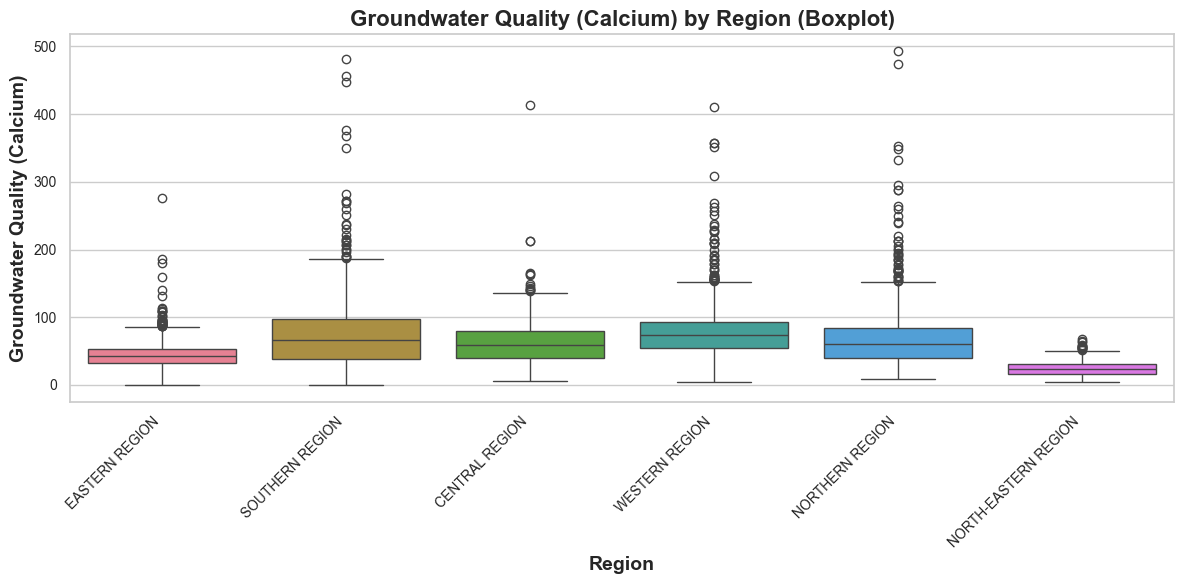

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Region', y='calcium', palette="husl")
plt.xlabel('Region', fontsize=14, fontweight='bold')
plt.ylabel('Groundwater Quality (Calcium)', fontsize=14, fontweight='bold')
plt.title('Groundwater Quality (Calcium) by Region (Boxplot)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\baljyot\AppData\Local\Temp\ipykernel_20432\3942223057.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='Region', y='calcium', jitter=True, palette="husl", alpha=0.6)


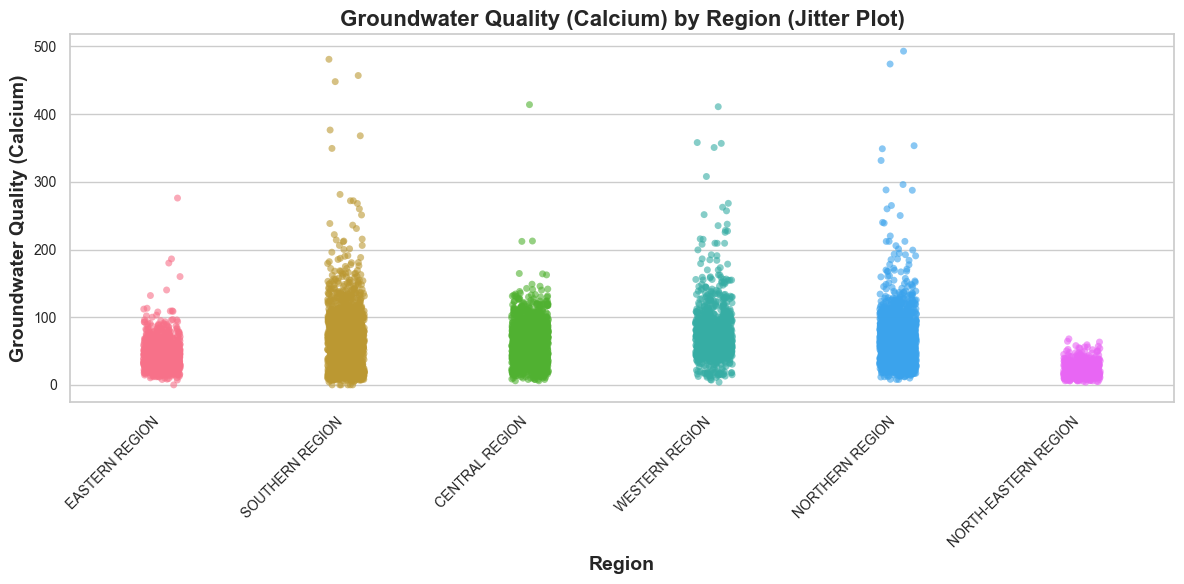

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create the jitter plot with alpha gradient
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='Region', y='calcium', jitter=True, palette="husl", alpha=0.6)
plt.xlabel('Region', fontsize=14, fontweight='bold')
plt.ylabel('Groundwater Quality (Calcium)', fontsize=14, fontweight='bold')
plt.title('Groundwater Quality (Calcium) by Region (Jitter Plot)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
